In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
import tqdm.autonotebook as tqdman

import utils

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_61041/9352543.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
ID = "test2"

<IPython.core.display.Javascript object>

In [24]:
MAGICC_TS_FILE = utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf_meta.csv"

<IPython.core.display.Javascript object>

In [25]:
file = pd.read_csv(MAGICC_TS_FILE)

<IPython.core.display.Javascript object>

In [40]:
file_T = file[file["variable"] == "delta_rf"]

<IPython.core.display.Javascript object>

In [27]:
file_ = file_T[["ms", "net_emissions", "2300-01-01 00:00:00"]][:10000]

KeyError: "['2300-01-01 00:00:00'] not in index"

<IPython.core.display.Javascript object>

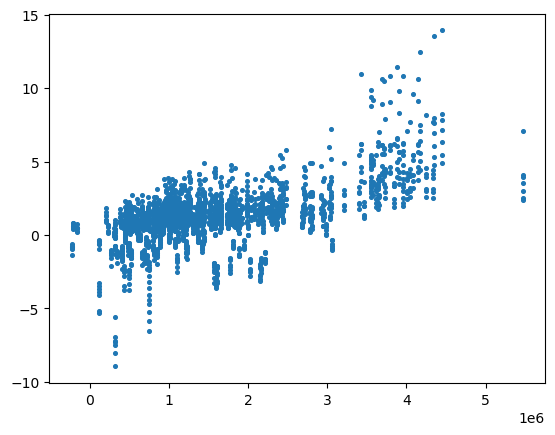

<IPython.core.display.Javascript object>

In [8]:
plt.scatter(file_["net_emissions"], file_["2300-01-01 00:00:00"], s=7)



/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_61041/1643593688.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sel_df = file_[file["ms"] == ms_sel]


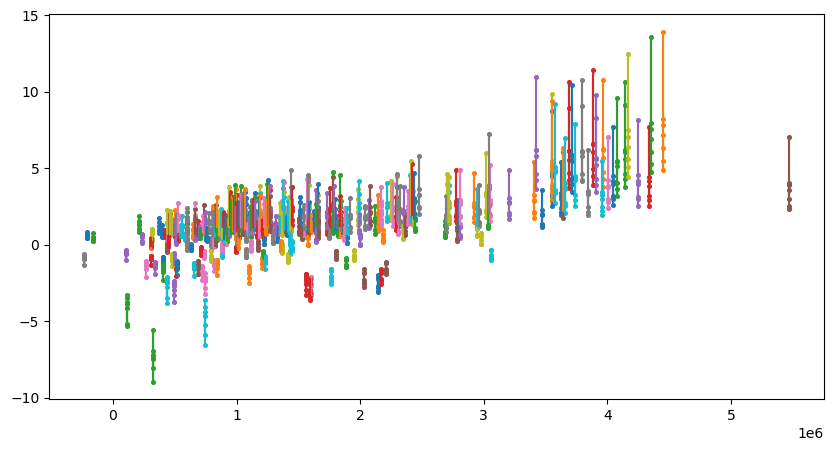

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

for ms_sel in file_.ms.unique():
    sel_df = file_[file["ms"] == ms_sel]
    ax.scatter(sel_df["net_emissions"], sel_df["2300-01-01 00:00:00"], s=7)
    ax.plot(sel_df["net_emissions"], sel_df["2300-01-01 00:00:00"])


In [41]:
## turn MtCo2 to PgC = 3.67 GtCo2
file_T["average_cdr_between_peak_and_15_temp_PgC"] = (
    file_T["net_CDR_at_15_temp"] * 3.67 * 1e-6
)

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_61041/3646416828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_T["average_cdr_between_peak_and_15_temp_PgC"] = (


<IPython.core.display.Javascript object>

In [42]:
## calculate estimation
file_T["SRM_guesstimate"] = (file_T["peak_warming"] - 1.5) / (
    file_T["TCRE"] * file_T["average_cdr_between_peak_and_15_temp_PgC"]
)

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_61041/3417420045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_T["SRM_guesstimate"] = (file_T["peak_warming"] - 1.5) / (


<IPython.core.display.Javascript object>

(-400.0, 0.0)

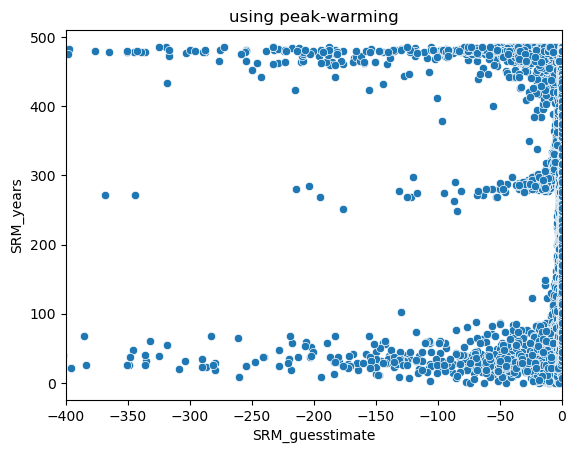

<IPython.core.display.Javascript object>

In [45]:
sns.scatterplot(data=file_T, x="SRM_guesstimate", y="SRM_years")
plt.title("using peak-warming")
plt.xlim(-400, 0)

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_61041/2531731943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_T["x"] = file_T["peak_warming"] - 1.5
/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_61041/2531731943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_T["y"] = file_T["TCRE"] * file_T["average_cdr_between_peak_and_15_temp_PgC"]


Text(0, 0.5, 'TCRE * N_ave')

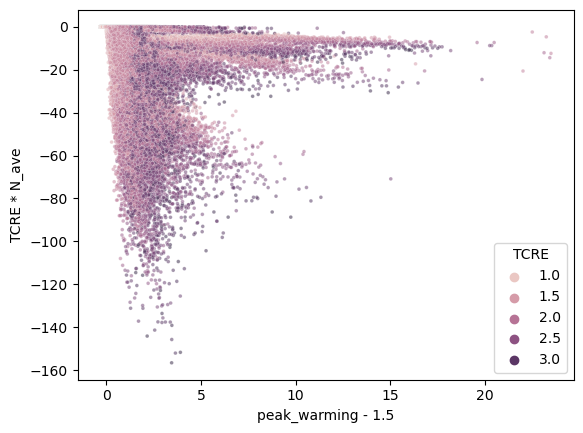

<IPython.core.display.Javascript object>

In [49]:
file_T["x"] = file_T["peak_warming"] - 1.5
file_T["y"] = file_T["TCRE"] * file_T["average_cdr_between_peak_and_15_temp_PgC"]
sns.scatterplot(data=file_T, x="x", y="y", s=7, alpha=0.5, hue="TCRE")
plt.xlabel("peak_warming - 1.5")
plt.ylabel("TCRE * N_ave")

Text(0.5, 1.0, 'test')

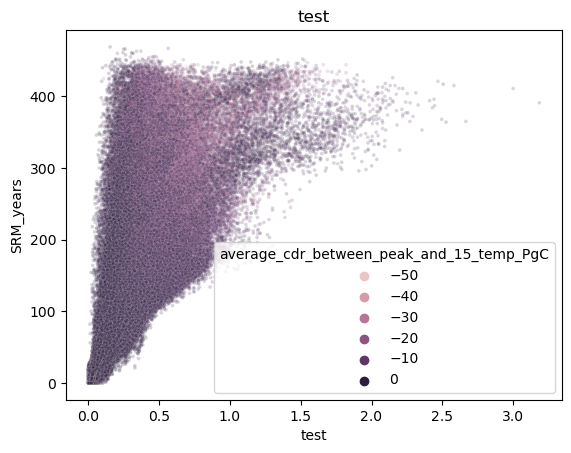

<IPython.core.display.Javascript object>

In [73]:
pdf["test"] = (pdf["peak_warming"] - 1.5) / pdf["TCRE"]
sns.scatterplot(
    data=pdf,
    x="test",
    y="SRM_years",
    hue="average_cdr_between_peak_and_15_temp_PgC",
    s=7,
    alpha=0.2,
)
plt.title("test")

In [20]:
len(pdf["SRM_guesstimate"].drop_duplicates())

160719

<IPython.core.display.Javascript object>